#Crash Course in Causality Worked Examples

**Niharika Santhoshini Karri**

**002727629**

#WORKED EXAMPLE - 1
  It is a dataset featuring deals from Groupon, used in calculating propensity scores

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
sns.set()

In [53]:
ds = pd.read_csv("https://raw.githubusercontent.com/Niharika-Santhoshini-Karri/Datasets/main/groupon.csv")

In [54]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 710 entries, 0 to 709
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   deal_id          710 non-null    object
 1   start_date       710 non-null    object
 2   min_req          710 non-null    int64 
 3   treatment        710 non-null    int64 
 4   prom_length      710 non-null    int64 
 5   price            710 non-null    int64 
 6   discount_pct     710 non-null    int64 
 7   coupon_duration  710 non-null    int64 
 8   featured         710 non-null    int64 
 9   limited_supply   710 non-null    int64 
 10  fb_likes         710 non-null    int64 
 11  quantity_sold    710 non-null    int64 
 12  revenue          710 non-null    int64 
dtypes: int64(11), object(2)
memory usage: 72.2+ KB


In [55]:
ds.head()

,deal_id,start_date,min_req,treatment,prom_length,price,discount_pct,coupon_duration,featured,limited_supply,fb_likes,quantity_sold,revenue
0,heli-flights,9/23/2011,10,1,4,99,51,185,1,1,290,540,53460
1,gl-champion-series-tennis-electric-factory,9/23/2011,20,1,2,95,41,9,0,1,43,190,18050
2,realm-of-terror-horror-experience,9/23/2011,50,1,3,25,50,38,0,1,208,380,9500
3,newport-gourmet,9/23/2011,15,1,3,50,50,369,0,1,16,90,4500
4,the-clayroom,9/23/2011,20,1,4,25,52,185,0,1,85,580,14500


In [56]:
# check the means for control and treatment
ds.groupby('treatment').mean()

<ipython-input-56-52ac66ee97d0>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ds.groupby('treatment').mean()


,min_req,prom_length,price,discount_pct,coupon_duration,featured,limited_supply,fb_likes,quantity_sold,revenue
treatment,,,,,,,,,,
0,1.00000,3.809717,37.870445,52.973684,95.941296,0.105263,0.852227,77.941296,333.002024,9720.987854
1,26.50463,3.379630,29.421296,53.263889,131.842593,0.143519,0.777778,113.203704,509.351852,12750.694444


In [57]:
ds_control = ds[ds.treatment==0]
ds_treatment = ds[ds.treatment==1]

In [58]:
from scipy.stats import ttest_ind

print(ds_control.revenue.mean(), ds_treatment.revenue.mean())


_, p = ttest_ind(ds_control.revenue, ds_treatment.revenue)
print(f'p={p:.3f}')

alpha = 0.05
if p > alpha:
    print('same distributions/same group mean (fail to reject H0 - we do not have enough evidence to reject H0)')
else:
    print('different distributions/different group mean (reject H0)')

9720.987854251012 12750.694444444445
p=0.040
different distributions/different group mean (reject H0)


In [59]:
from scipy.stats import ttest_ind

print(ds_control.fb_likes.mean(), ds_treatment.fb_likes.mean())

_, p = ttest_ind(ds_control.fb_likes, ds_treatment.fb_likes)
print(f'p={p:.3f}')


alpha = 0.05
if p > alpha:
    print('same distributions/same group mean (fail to reject H0 - we do not have enough evidence to reject H0)')
else:
    print('different distributions/different group mean (reject H0)')

77.9412955465587 113.20370370370371
p=0.004
different distributions/different group mean (reject H0)


In [60]:
X = ds[['prom_length', 'price', 'discount_pct', 'coupon_duration', 'featured', 'limited_supply']]
y = ds['treatment']

X.head()

,prom_length,price,discount_pct,coupon_duration,featured,limited_supply
0,4,99,51,185,1,1
1,2,95,41,9,0,1
2,3,25,50,38,0,1
3,3,50,50,369,0,1
4,4,25,52,185,0,1


In [61]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X, y)

LogisticRegression()

In [62]:
lr.coef_.ravel()

array([-0.3283715 , -0.00859709, -0.00794035,  0.00352025,  0.30799384,
       -0.36649838])

In [63]:
X.columns.to_numpy()

array(['prom_length', 'price', 'discount_pct', 'coupon_duration',
       'featured', 'limited_supply'], dtype=object)

In [64]:
coeffs = pd.DataFrame({
    'column':X.columns.to_numpy(),
    'coeff':lr.coef_.ravel(),
})
coeffs

,column,coeff
0,prom_length,-0.328371
1,price,-0.008597
2,discount_pct,-0.007940
3,coupon_duration,0.003520
4,featured,0.307994
5,limited_supply,-0.366498


In [65]:
pred_binary = lr.predict(X)
pred_prob = lr.predict_proba(X)

print('the binary prediction is:', pred_binary[0])
print('the corresponding probabilities are:', pred_prob[0])

the binary prediction is: 0
the corresponding probabilities are: [0.74080759 0.25919241]


In [66]:
ds['ps'] = pred_prob[:, 1]


def logit(p):
    logit_value = math.log(p / (1-p))
    return logit_value

ds['ps_logit'] = ds.ps.apply(lambda x: logit(x))

ds.head()

,deal_id,start_date,min_req,treatment,prom_length,price,discount_pct,coupon_duration,featured,limited_supply,fb_likes,quantity_sold,revenue,ps,ps_logit
0,heli-flights,9/23/2011,10,1,4,99,51,185,1,1,290,540,53460,0.259192,-1.050170
1,gl-champion-series-tennis-electric-factory,9/23/2011,20,1,2,95,41,9,0,1,43,190,18050,0.230198,-1.207193
2,realm-of-terror-horror-experience,9/23/2011,50,1,3,25,50,38,0,1,208,380,9500,0.288405,-0.903144
3,newport-gourmet,9/23/2011,15,1,3,50,50,369,0,1,16,90,4500,0.511781,0.047131
4,the-clayroom,9/23/2011,20,1,4,25,52,185,0,1,85,580,14500,0.325212,-0.729920


<Axes: xlabel='ps', ylabel='Count'>

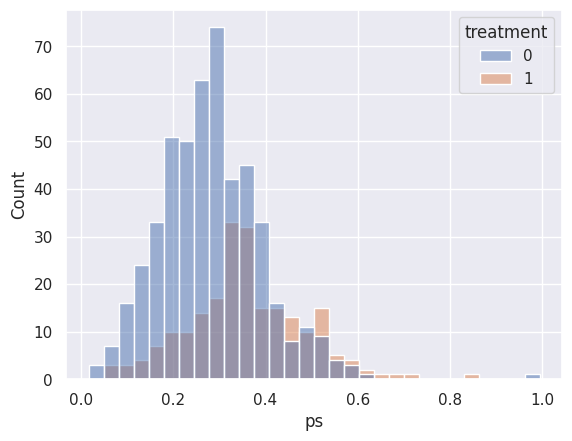

In [67]:
sns.histplot(data=ds, x='ps', hue='treatment')

In [68]:
X1 = ds[['min_req', 'prom_length', 'price', 'discount_pct', 'coupon_duration', 'featured','limited_supply']]
y = ds['treatment']


lr1 = LogisticRegression(max_iter=1000)
lr1.fit(X1, y)
pred_prob1 = lr1.predict_proba(X1)
ds['ps1'] = pred_prob1[:, 1]

<Axes: xlabel='ps1', ylabel='Count'>

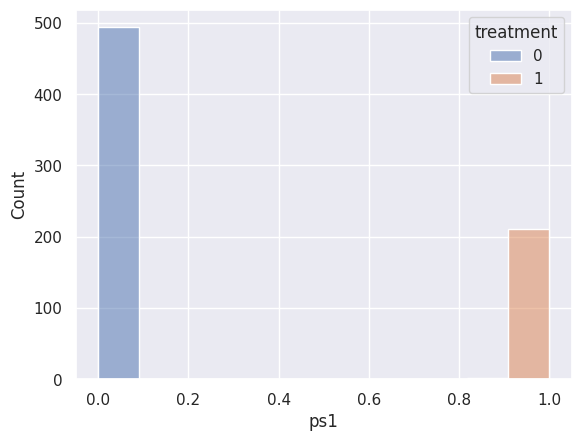

In [69]:
sns.histplot(data=ds, x='ps1', hue='treatment')

In [70]:
from sklearn.neighbors import NearestNeighbors

caliper = np.std(ds.ps) * 0.25
print(f'caliper (radius) is: {caliper:.4f}')

n_neighbors = 10

# setup knn
knn = NearestNeighbors(n_neighbors=n_neighbors, radius=caliper)

ps = ds[['ps']]  # double brackets as a dataframe
knn.fit(ps)

caliper (radius) is: 0.0304


NearestNeighbors(n_neighbors=10, radius=0.030379114699693434)

In [71]:
# distances and indexes
distances, neighbor_indexes = knn.kneighbors(ps)

print(neighbor_indexes.shape)

# the 10 closest points to the first point
print(distances[0])
print(neighbor_indexes[0])

(710, 10)
[0.         0.00010796 0.00040665 0.00078187 0.00115838 0.00135219
 0.00135219 0.00164927 0.00166947 0.00203843]
[  0 348 388 415 624 150 494 463 372 345]


In [72]:
matched_control = []

for current_index, row in ds.iterrows():
    if row.treatment == 0:
        ds.loc[current_index, 'matched'] = np.nan
    else:
        for idx in neighbor_indexes[current_index, :]:
            if (current_index != idx) and (ds.loc[idx].treatment == 0):
                if idx not in matched_control:
                    ds.loc[current_index, 'matched'] = idx
                    matched_control.append(idx)
                    break

In [73]:
print('total observations in treatment:', len(ds[ds.treatment==1]))
print('total matched observations in control:', len(matched_control))

total observations in treatment: 216
total matched observations in control: 185


In [74]:
treatment_matched = ds.dropna(subset=['matched'])


control_matched_idx = treatment_matched.matched
control_matched_idx = control_matched_idx.astype(int)
control_matched = ds.loc[control_matched_idx, :]


ds_matched = pd.concat([treatment_matched, control_matched])

ds_matched.treatment.value_counts()

1    185
0    185
Name: treatment, dtype: int64

In [75]:
# matched control and treatment
ds_matched_control = ds_matched[ds_matched.treatment==0]
ds_matched_treatment = ds_matched[ds_matched.treatment==1]

In [76]:
from scipy.stats import ttest_ind
print(ds_matched_control.revenue.mean(), ds_matched_treatment.revenue.mean())

# compare samples
_, p = ttest_ind(ds_matched_control.revenue, ds_matched_treatment.revenue)
print(f'p={p:.3f}')


alpha = 0.05  # significance level
if p > alpha:
    print('same distributions/same group mean (fail to reject H0 - we do not have enough evidence to reject H0)')
else:
    print('different distributions/different group mean (reject H0)')

9146.783783783783 13275.405405405405
p=0.051
same distributions/same group mean (fail to reject H0 - we do not have enough evidence to reject H0)


In [77]:
from numpy import mean
from numpy import var
from math import sqrt


def cohen_d(d1, d2):

	n1, n2 = len(d1), len(d2)

	s1, s2 = var(d1, ddof=1), var(d2, ddof=1)

	s = sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))

	u1, u2 = mean(d1), mean(d2)

	return (u1 - u2) / s

In [78]:
effect_sizes = []
cols = ['prom_length', 'price', 'discount_pct', 'coupon_duration', 'featured','limited_supply']

for cl in cols:
    _, p_before = ttest_ind(ds_control[cl], ds_treatment[cl])
    _, p_after = ttest_ind(ds_matched_control[cl], ds_matched_treatment[cl])
    cohen_d_before = cohen_d(ds_treatment[cl], ds_control[cl])
    cohen_d_after = cohen_d(ds_matched_treatment[cl], ds_matched_control[cl])
    effect_sizes.append([cl,'before', cohen_d_before, p_before])
    effect_sizes.append([cl,'after', cohen_d_after, p_after])

In [79]:
ds_effect_sizes = pd.DataFrame(effect_sizes, columns=['feature', 'matching', 'effect_size', 'p-value'])
ds_effect_sizes

,feature,matching,effect_size,p-value
0,prom_length,before,-0.328313,0.000063
1,prom_length,after,-0.055414,0.594388
2,price,before,-0.233573,0.004315
3,price,after,-0.004145,0.968225
4,discount_pct,before,0.035411,0.664344
5,discount_pct,after,0.118635,0.254612
6,coupon_duration,before,0.282300,0.000571
7,coupon_duration,after,-0.032618,0.753920
8,featured,before,0.119074,0.144802
9,featured,after,-0.030542,0.769122


<Axes: xlabel='effect_size', ylabel='feature'>

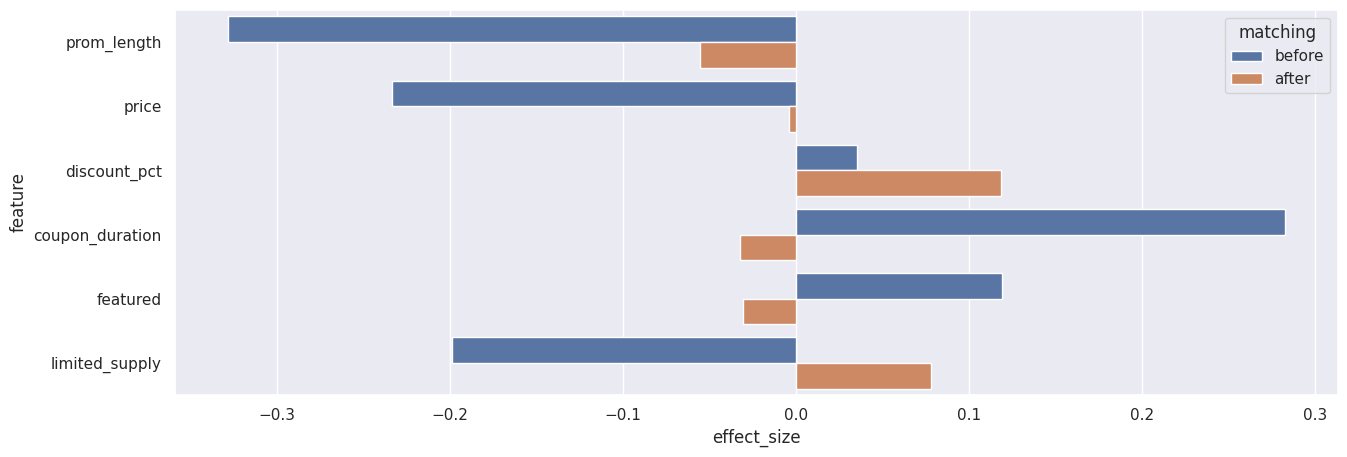

In [80]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(data=ds_effect_sizes, x='effect_size', y='feature', hue='matching', orient='h')

#WORKED EXAMPLE -2

This example demonstrates the effect of basic one-to-one pairing on the overall average effect of a treatment.

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [82]:
dp = pd.read_csv("https://raw.githubusercontent.com/Niharika-Santhoshini-Karri/Datasets/main/smoker.csv")

In [83]:
dp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   smoker     10000 non-null  int64
 1   treatment  10000 non-null  int64
 2   outcome    10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB


In [84]:
dp.head()

,smoker,treatment,outcome
0,0,0,0
1,1,1,0
2,1,1,0
3,0,1,0
4,0,0,0


In [85]:
dp.groupby('treatment')['outcome'].mean()

treatment
0    0.235134
1    0.340213
Name: outcome, dtype: float64

In [86]:
dp_control = dp[dp.treatment==0]
dp_treatment = dp[dp.treatment==1]

dead_control = len(dp_control.loc[dp.outcome==1])
dead_treatment = len(dp_treatment.loc[dp.outcome==1])
total_control = len(dp_control)
total_treatment = len(dp_treatment)
print(dead_control, total_control)
print(dead_treatment, dead_treatment)

1645 6996
1022 1022


In [87]:
# statistical hypothesis test
from statsmodels.stats.proportion import proportions_ztest

alpha = 0.05


z, p = proportions_ztest([dead_control, dead_treatment], nobs=[total_control, total_treatment])

# print the p value
print(f'p-value: {p:.3f}')

if p <= alpha:
    print('The result is significant: there is a difference in the conversion rate, reject H0')
else:
    print('The result is not significant: there is no difference in the conversion rate, fail to reject H0')

p-value: 0.000
The result is significant: there is a difference in the conversion rate, reject H0


In [88]:
# ate: average treatment effect
death_rate_control = dp.groupby('treatment')['outcome'].mean()[0]
death_rate_treatment = dp.groupby('treatment')['outcome'].mean()[1]

ate = death_rate_treatment - death_rate_control
print(f'ATE before matching is {ate:.3f}')
print(f'The percentage of deaths will increase {ate:.1%} if treated')
print('Conclusion: treatment should NOT be done')

ATE before matching is 0.105
The percentage of deaths will increase 10.5% if treated
Conclusion: treatment should NOT be done


In [89]:
# before matching treatment group has way more smokers than the control group
smoker_ratio = dp.groupby('treatment')['smoker'].value_counts(normalize=True)
smoker_ratio

treatment  smoker
0          0         0.807033
           1         0.192967
1          1         0.557590
           0         0.442410
Name: smoker, dtype: float64

In [90]:
# multi-index series to dataframe
smoker_ratio = smoker_ratio.to_frame(name="ratio").reset_index()
smoker_ratio

,treatment,smoker,ratio
0,0,0,0.807033
1,0,1,0.192967
2,1,1,0.557590
3,1,0,0.442410


<Axes: xlabel='treatment', ylabel='ratio'>

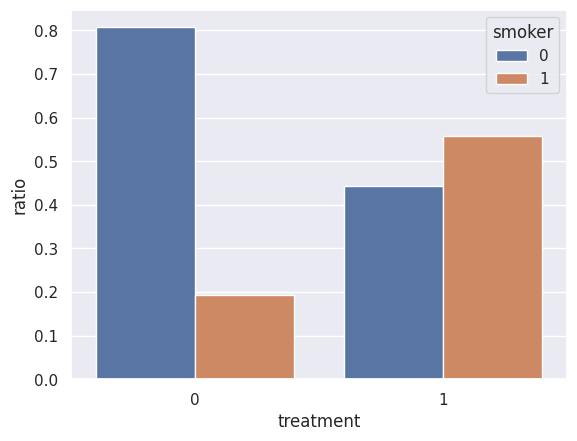

In [91]:
# sns group bar chart
sns.barplot(
    data=smoker_ratio,
    x='treatment',
    y='ratio',
    hue='smoker',
)

In [92]:
treatment = dp[dp.treatment==1]
control = dp[dp.treatment==0]
treatment = treatment.reset_index(drop=True)
treatment.head()

,smoker,treatment,outcome
0,1,1,0
1,1,1,0
2,0,1,0
3,1,1,1
4,1,1,0


In [93]:
control.head()

,smoker,treatment,outcome
0,0,0,0
4,0,0,0
5,0,0,0
6,0,0,0
8,0,0,0


In [94]:
# for each person in treatment based on smoker or not, find a 1:1 match via sampling without replacement
matched_control = []

for index, row in treatment.iterrows():
    matched = control[control.smoker==row.smoker].sample(random_state=42).iloc[0]
    matched_control.append(matched)

# convert list to dataframe and reset index
matched_control = pd.DataFrame(matched_control).reset_index(drop=True)
matched_control

,smoker,treatment,outcome
0,1,0,1
1,1,0,1
2,0,0,0
3,1,0,1
4,1,0,1
...,...,...,...
2999,0,0,0
3000,0,0,0
3001,1,0,1
3002,1,0,1


In [95]:
dp_matched = pd.concat([treatment, matched_control])
dp_matched[['smoker', 'treatment', 'outcome']] = dp_matched[['smoker', 'treatment', 'outcome']].astype(int)  # change to int
dp_matched

,smoker,treatment,outcome
0,1,1,0
1,1,1,0
2,0,1,0
3,1,1,1
4,1,1,0
...,...,...,...
2999,0,0,0
3000,0,0,0
3001,1,0,1
3002,1,0,1


In [96]:
smoker_ratio_matched = dp_matched.groupby('treatment')['smoker'].value_counts(normalize=True)
smoker_ratio_matched

treatment  smoker
0          1         0.55759
           0         0.44241
1          1         0.55759
           0         0.44241
Name: smoker, dtype: float64

In [97]:
smoker_ratio_matched = smoker_ratio_matched.to_frame(name="ratio").reset_index()
smoker_ratio_matched

,treatment,smoker,ratio
0,0,1,0.55759
1,0,0,0.44241
2,1,1,0.55759
3,1,0,0.44241


<Axes: xlabel='treatment', ylabel='ratio'>

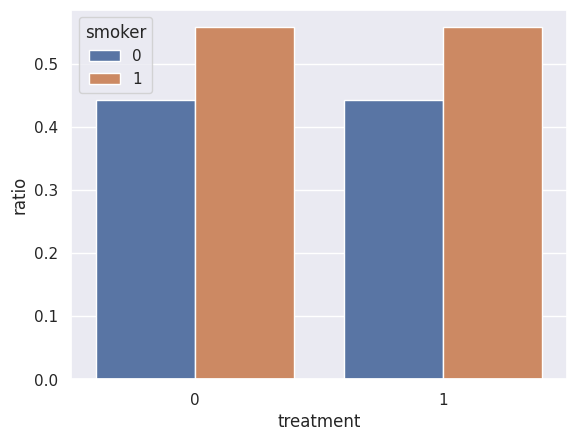

In [98]:
sns.barplot(
    data=smoker_ratio_matched,
    x='treatment',
    y='ratio',
    hue='smoker',
)

<Axes: xlabel='treatment', ylabel='ratio'>

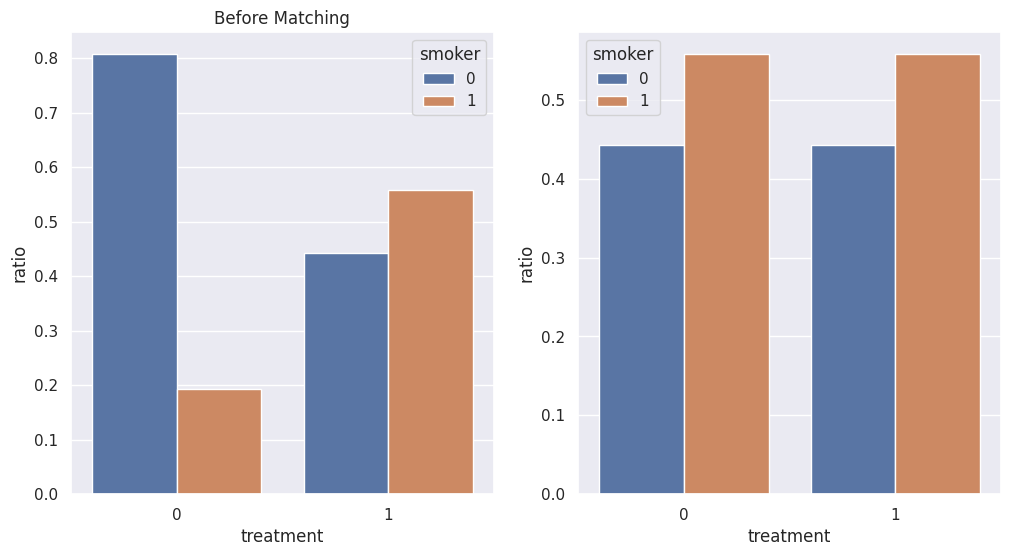

In [99]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.barplot(
    data=smoker_ratio,
    x='treatment',
    y='ratio',
    hue='smoker',
    ax=ax[0],
)

ax[0].set_title('Before Matching')

sns.barplot(
    data=smoker_ratio_matched,
    x='treatment',
    y='ratio',
    hue='smoker',
    ax=ax[1],
)

In [100]:
dp_matched.groupby('treatment')['outcome'].mean()

treatment
0    0.557590
1    0.340213
Name: outcome, dtype: float64

In [101]:
death_rate_control_matched = dp_matched.groupby('treatment')['outcome'].mean()[0]
death_rate_treatment_matched = dp_matched.groupby('treatment')['outcome'].mean()[1]

ate_matched = death_rate_treatment_matched - death_rate_control_matched
print(f'ATE after matching is {ate_matched:.3f}')
print(f'The percentage of deaths will decrease {ate_matched:.1%} if treated')
print('Conclusion: treatment should be done')

ATE after matching is -0.217
The percentage of deaths will decrease -21.7% if treated
Conclusion: treatment should be done


The calculated Average Treatment Effect (ATE) post-matching is -0.217, which quantitatively signifies a 21.7% reduction in the event rate (in this context, deaths) when the treatment is administered. This negative value of the ATE suggests a statistically significant inverse relationship between the treatment and the outcome of interest, i.e., mortality. Given these findings, it can be concluded that the intervention under study is efficacious in reducing the incidence of deaths by a substantial margin. Hence, from an analytical standpoint, the deployment of this treatment is recommended, as it demonstrably contributes to a marked decrease in mortality rates.

MIT License

Copyright (c) 2023 Niharika Karri

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.